In [2]:
import sys

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from scipy.signal import wiener  

In [3]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

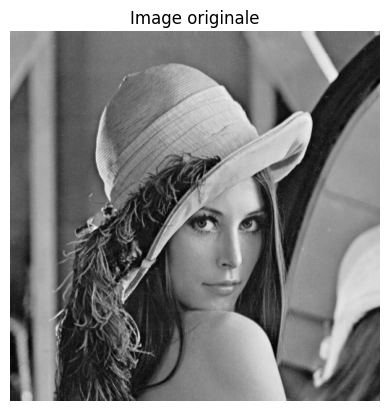

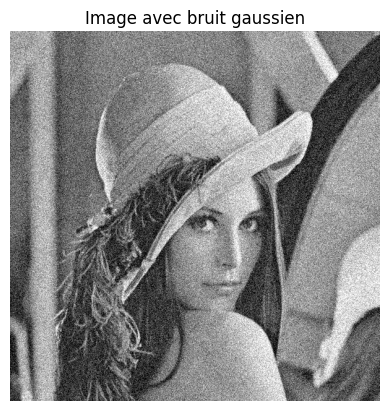

PSNR entre l'image originale et l'image bruitée :  20.090866390792122


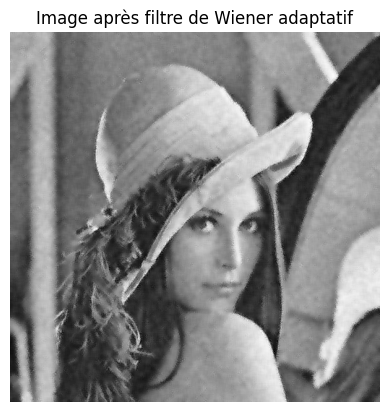

PSNR entre l'image originale et l'image débruitée :  28.66971463804251


In [ ]:

# Charger et afficher l'image originale
image = import_image("lena.pgm")
display_image(image, "Image originale")

# Normaliser l'image entre 0 et 1
image = image / 255.0

# Ajouter du bruit gaussien de variance 0.01
noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)  # S'assurer que les valeurs restent entre 0 et 1
display_image(image_noised, 'Image avec bruit gaussien')

# Calculer le PSNR entre l'image originale et l'image bruitée
psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

# Paramètres du filtre
L = 3  # Demi-taille de la fenêtre

# Estimer la moyenne locale et la variance locale de l'image bruitée
local_mean = uniform_filter(image_noised, size=(2*L + 1))
local_mean_sq = uniform_filter(image_noised**2, size=(2*L + 1))
local_variance = local_mean_sq - local_mean**2

# Appliquer le filtre de Wiener
wiener_filtered = local_mean + (np.maximum(local_variance - noise_variance, 0) / 
                                (local_variance + noise_variance)) * (image_noised - local_mean)

# Afficher l'image débruitée
display_image(wiener_filtered, "Image après filtre de Wiener adaptatif")

# Calculer le PSNR entre l'image originale et l'image débruitée
psnr_originale_debruitee = psnr(image * 255, wiener_filtered * 255)
print("PSNR entre l'image originale et l'image débruitée : ", psnr_originale_debruitee)

# Sauvegarder les résultats
ski.io.imsave("results/noised.pgm", (image_noised * 255).astype(np.uint8))
ski.io.imsave("results/denoised.pgm", (wiener_filtered * 255).astype(np.uint8))
